In [2]:
import pennylane as qml

from NQE_analysis import get_circuit, get_circuit_by_energy

In [3]:
def draw_pennylane_circuit(circuit_value):
    each_energy = circuit_value['energy']
    each_circuit = circuit_value['gen_op_seq']
    @qml.qnode(dev)
    def circuit():
        for gate, theta, (w0, w1) in each_circuit:
            if gate == "RX":
                qml.RX(theta, wires=w0)
            elif gate == "RY":
                qml.RY(theta, wires=w0)
            elif gate == "RZ":
                qml.RZ(theta, wires=w0)
            elif gate == "CNOT":
                qml.CNOT(wires=[w0, w1])
            elif gate == "CZ":
                qml.CZ(wires=[w0, w1])
            elif gate == "I":
                qml.Identity(wires=w0)
        return qml.state()

    fig, ax = qml.draw_mpl(circuit, expand=False)()
    fig.set_size_inches(11, 3)
    fig.suptitle(f"Energy: {each_energy:.6f}", fontsize=14)
    return fig

In [4]:
circuit_filename = 'data_fix_sampling_SM_generated_circuit.json'
n_circuit = 50
dev = qml.device("default.qubit", wires=4)

In [5]:
circuits = get_circuit(circuit_filename)

getting circuit...


In [6]:
good_circuits = get_circuit_by_energy(circuits, 'top', n_circuit=n_circuit)
bad_circuits = get_circuit_by_energy(circuits, 'bottom', n_circuit=n_circuit)

extracting top...
extracting bottom...


# SM(7M) Good Circuits

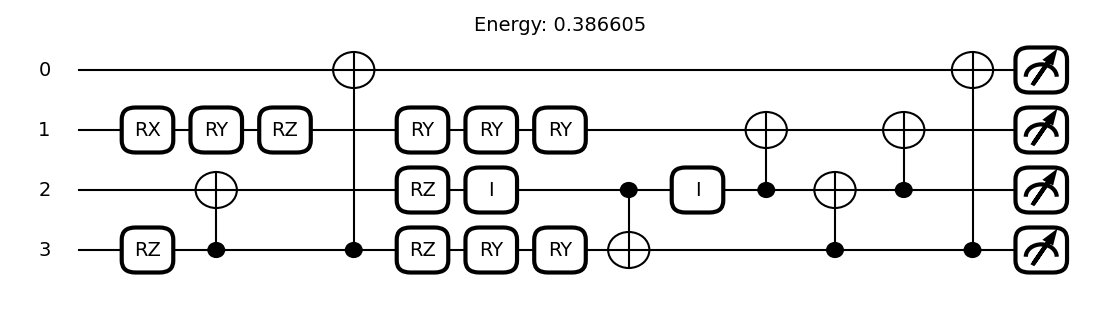

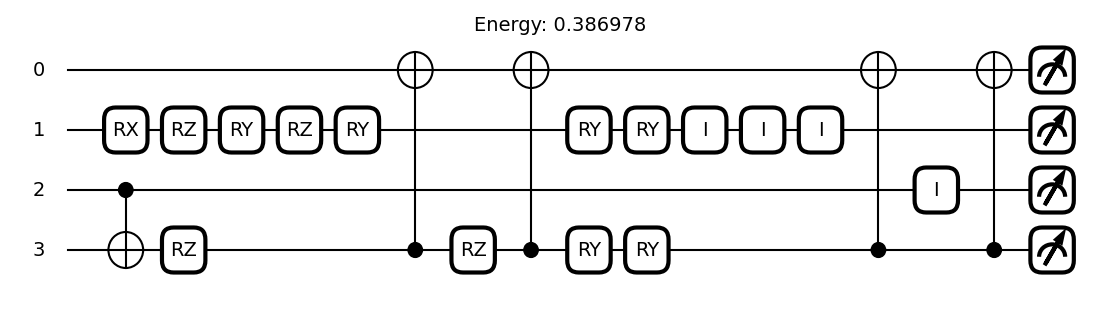

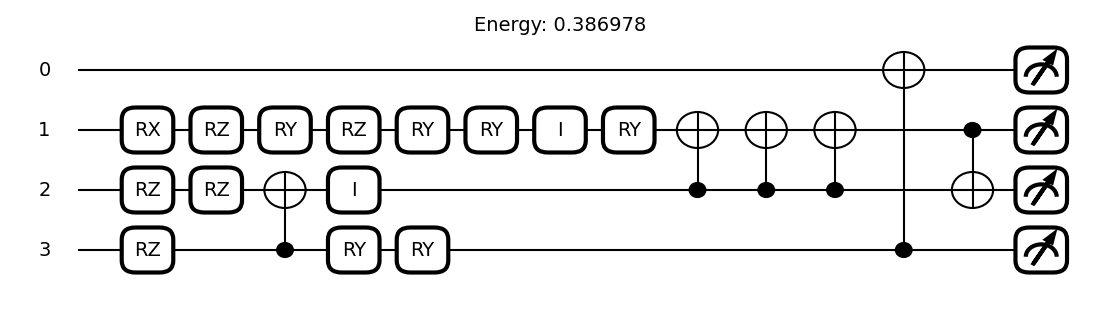

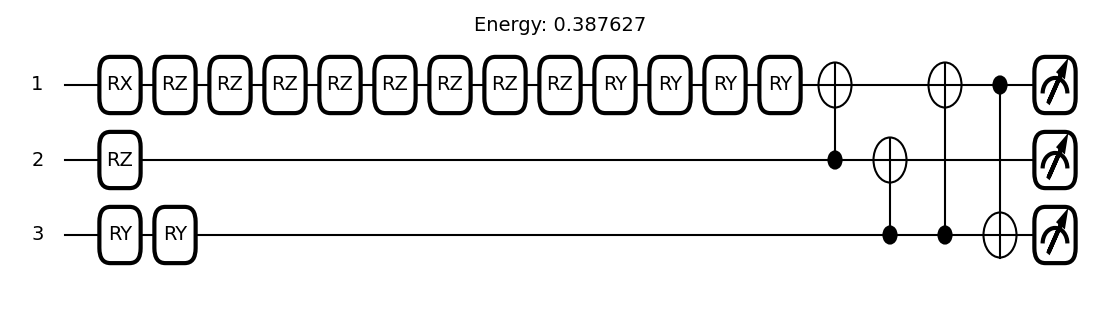

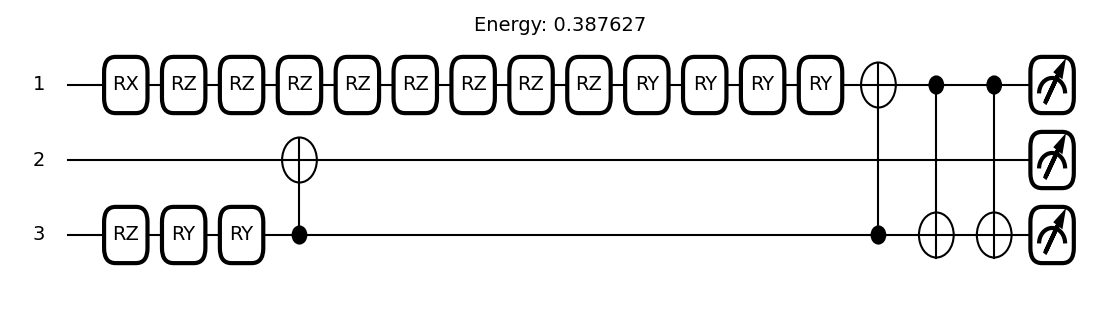

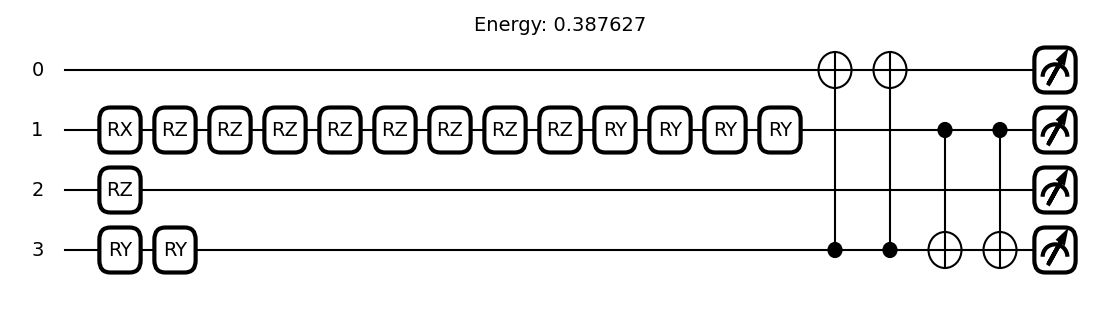

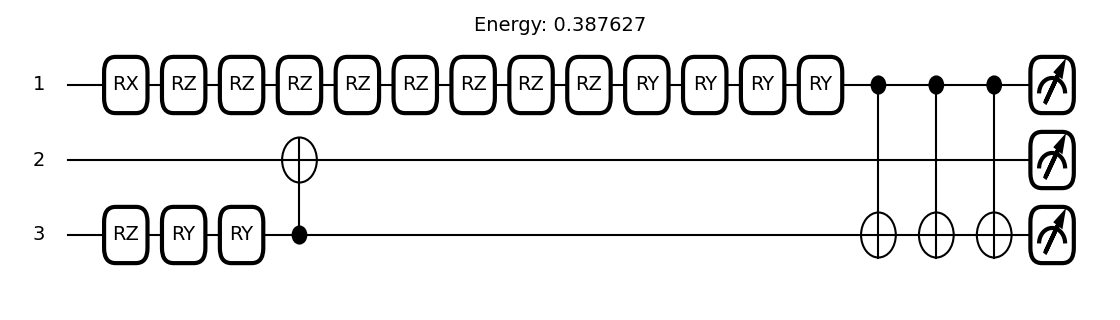

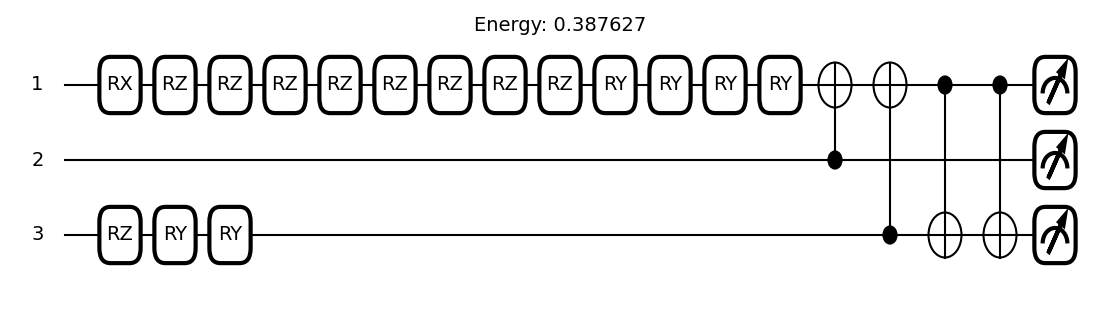

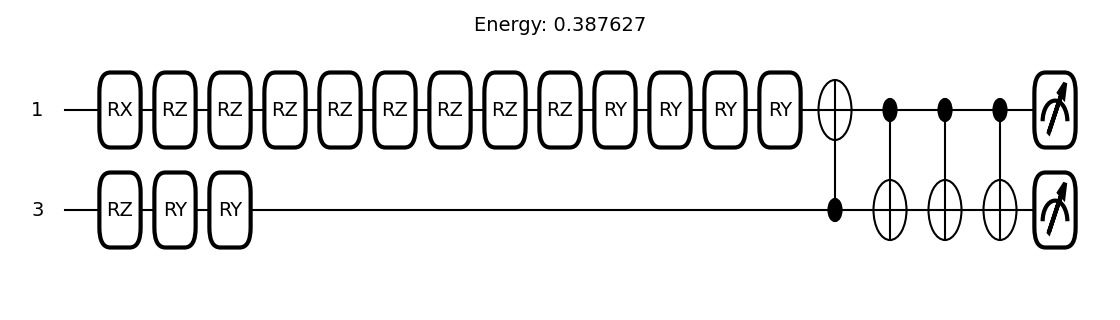

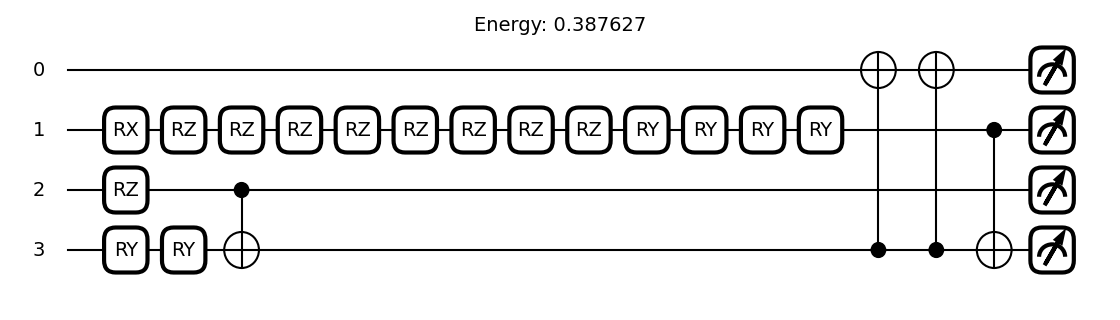

In [7]:
for i in range(10):
    draw_pennylane_circuit(good_circuits.iloc[i])

# SM(7M) Bad Circuits

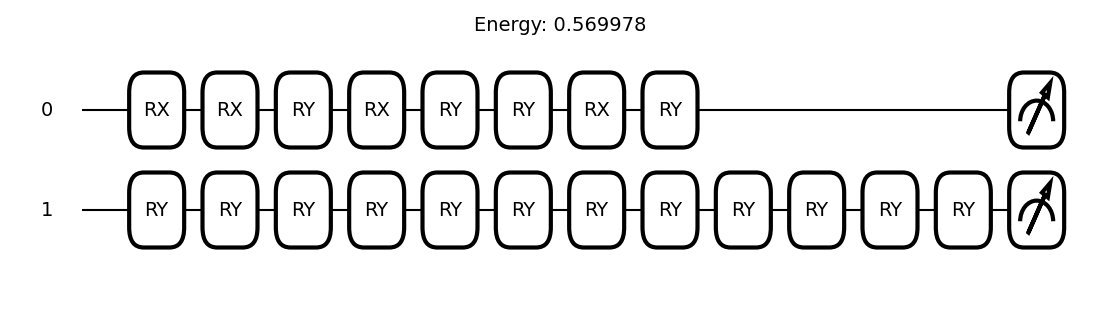

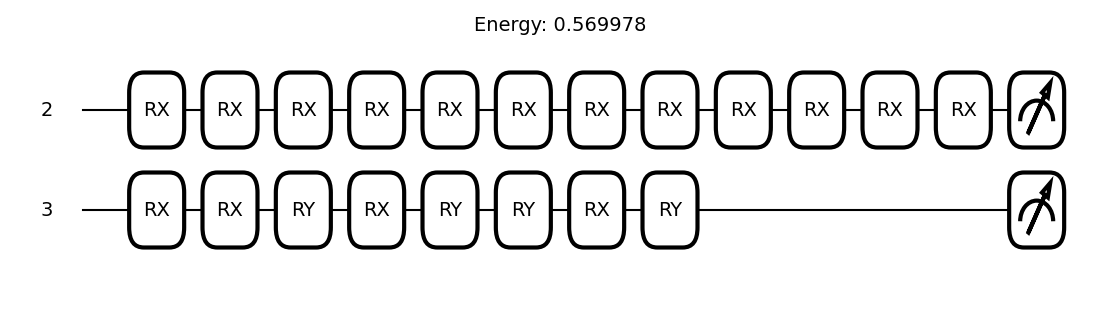

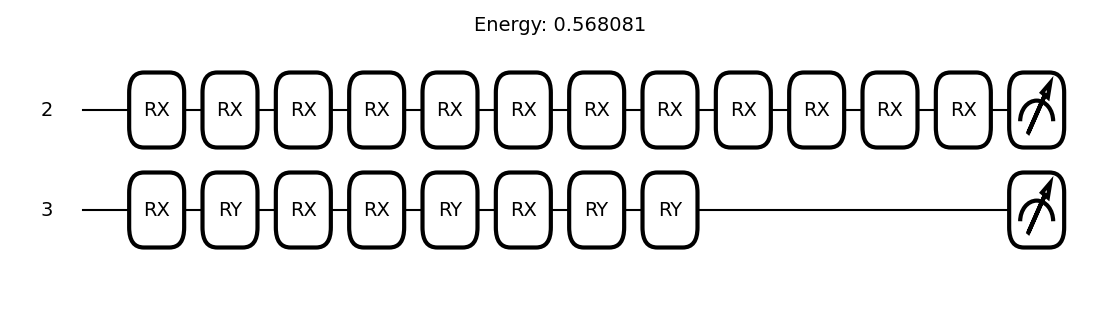

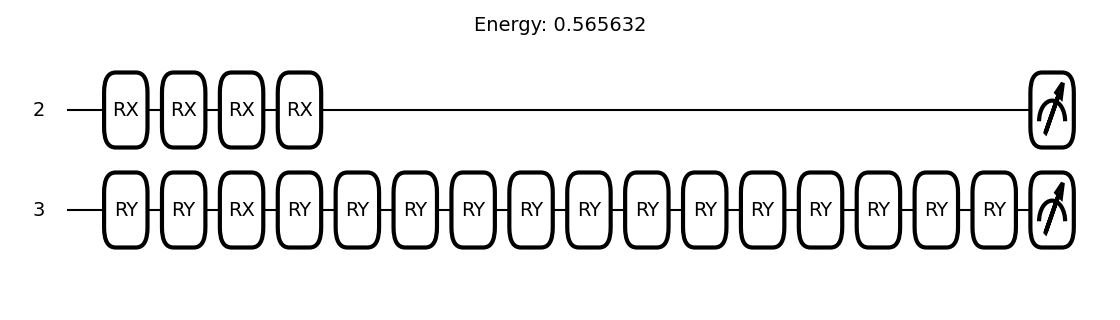

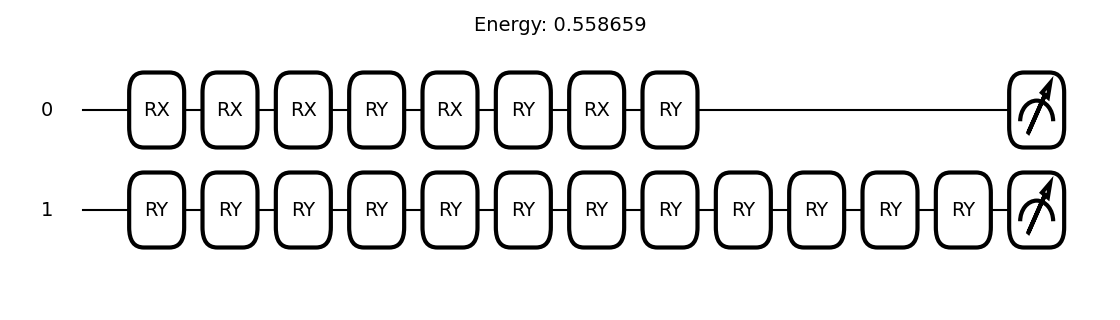

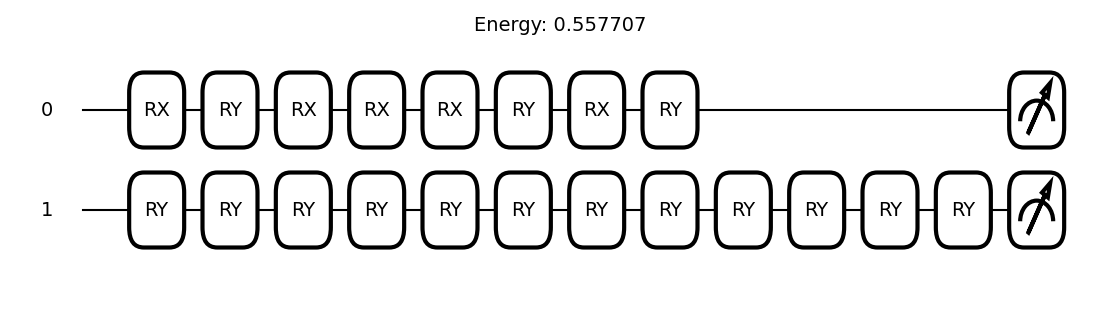

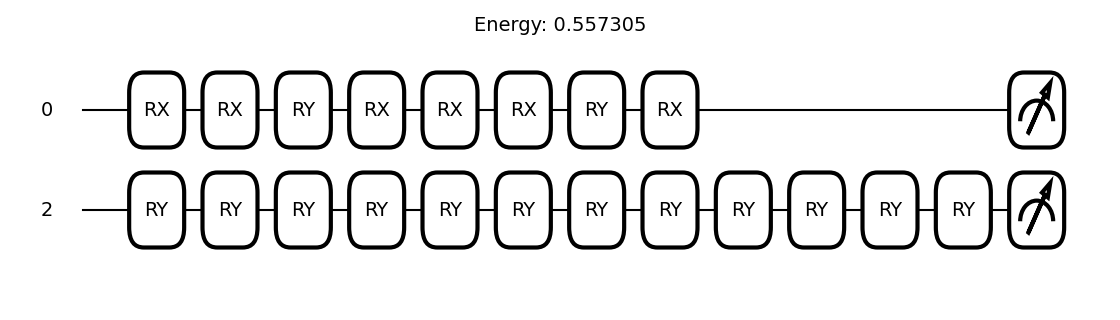

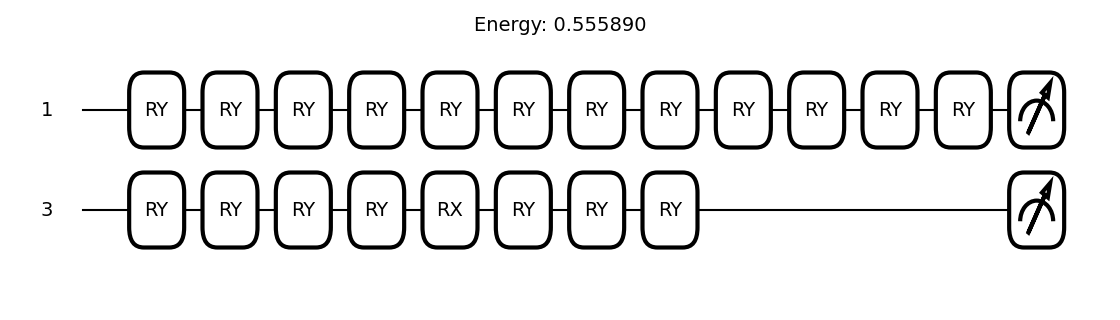

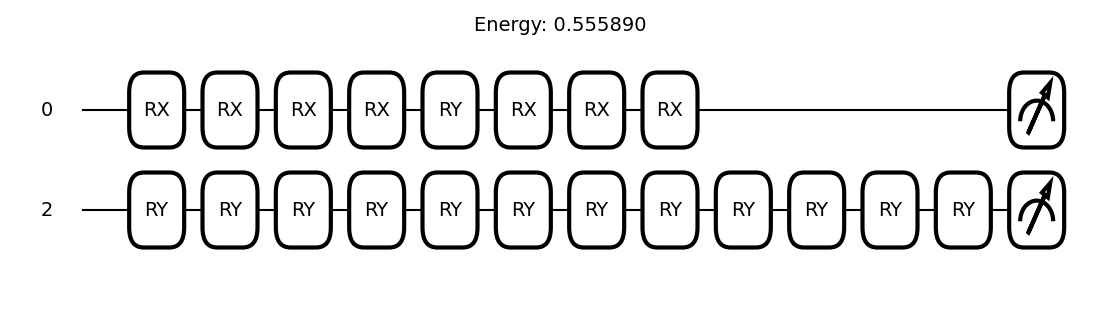

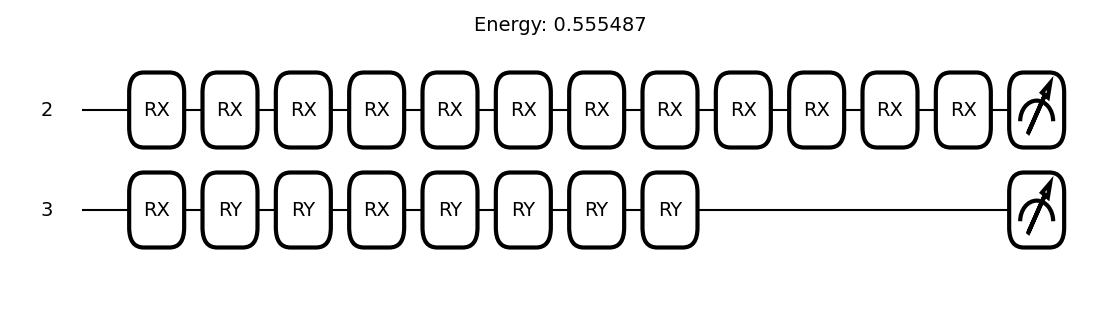

In [8]:
for i in range(10):
    draw_pennylane_circuit(bad_circuits.iloc[i])

In [9]:
circuit_filename = 'data_fix_sampling_SM2_generated_circuit.json'
n_circuit = 50
dev = qml.device("default.qubit", wires=4)

In [10]:
circuits = get_circuit(circuit_filename)
good_circuits = get_circuit_by_energy(circuits, 'top', n_circuit=n_circuit)
bad_circuits = get_circuit_by_energy(circuits, 'bottom', n_circuit=n_circuit)

getting circuit...
extracting top...
extracting bottom...


# SM2(22M) Good Circuits

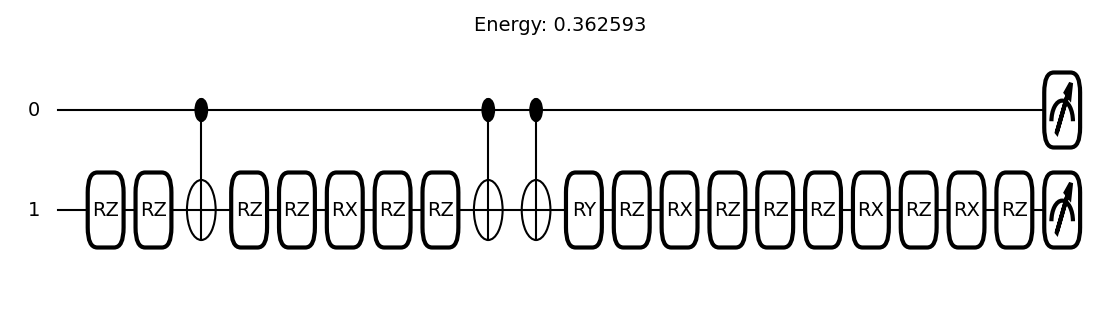

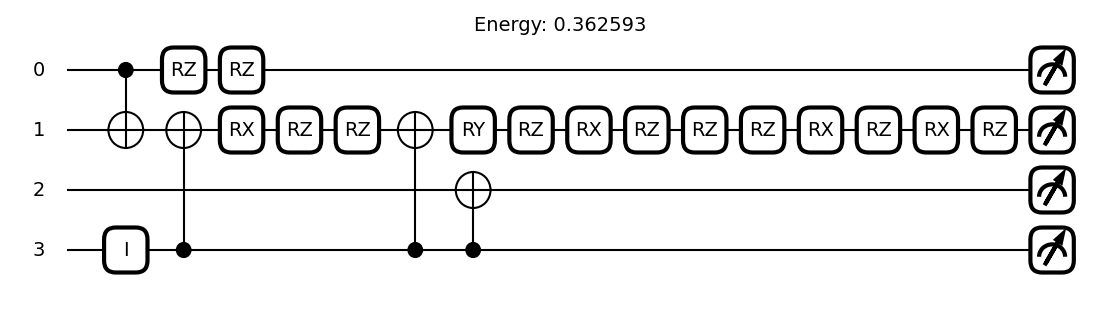

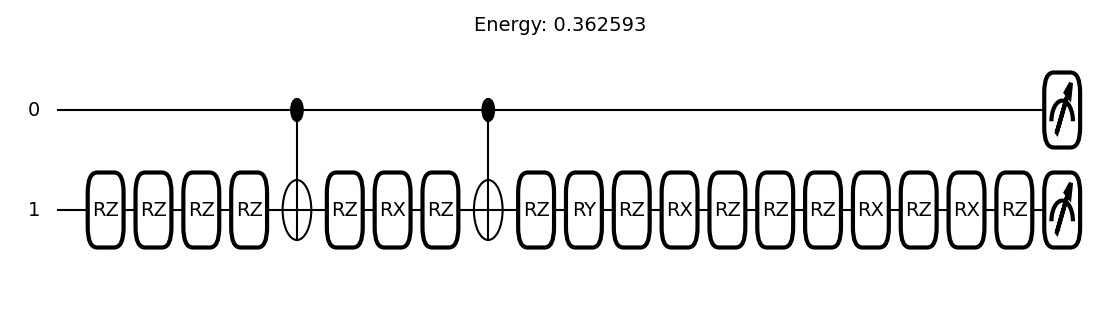

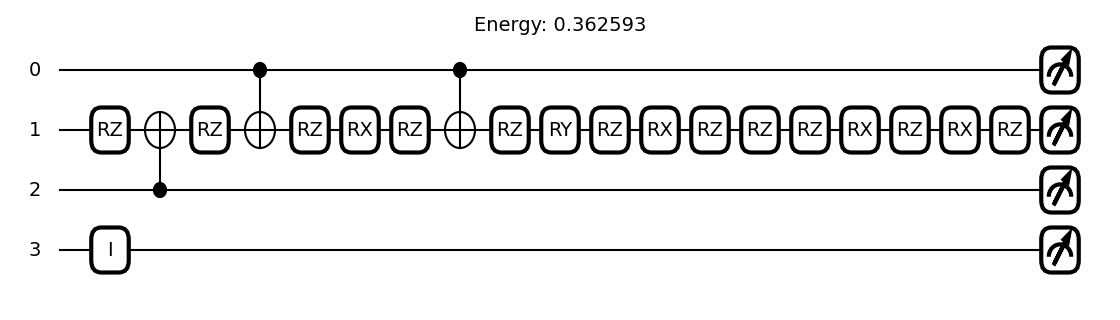

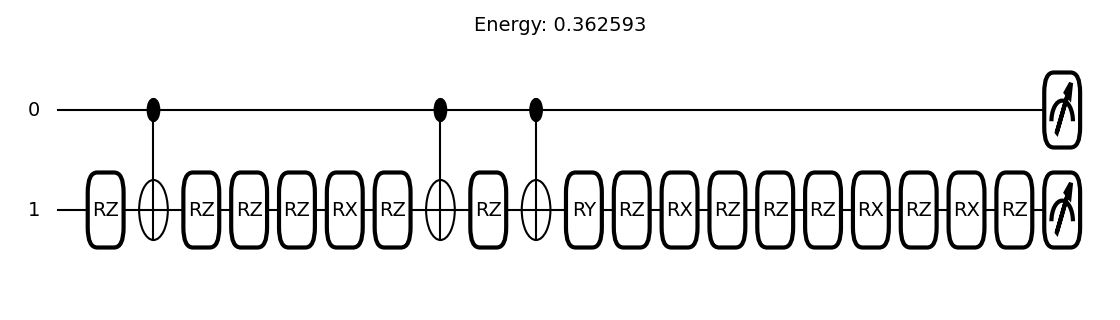

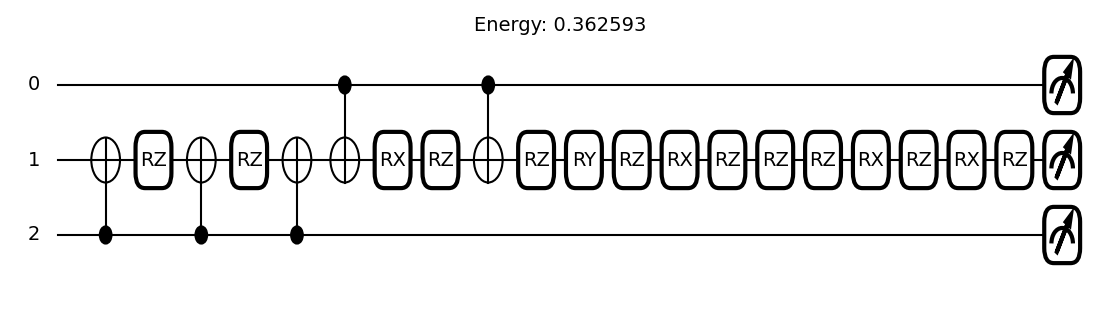

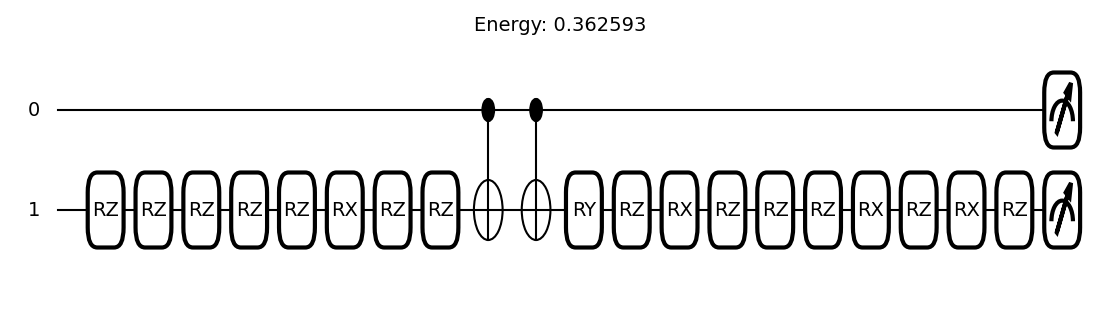

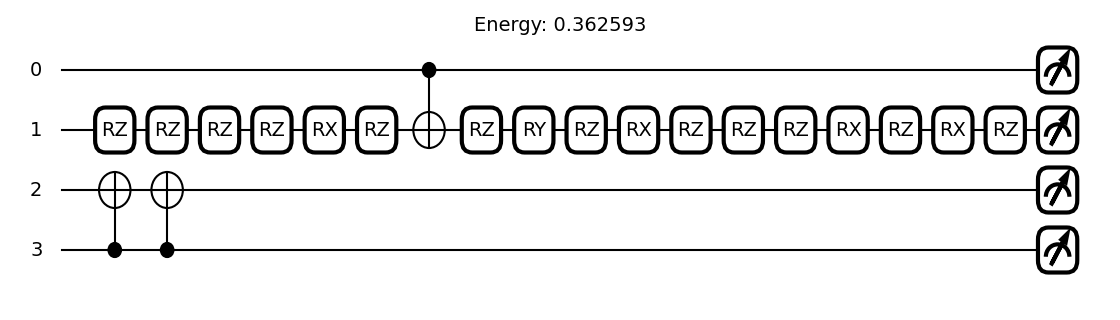

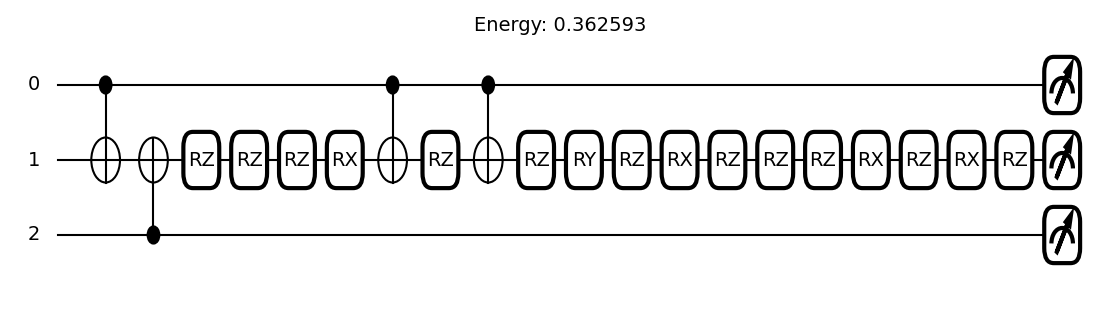

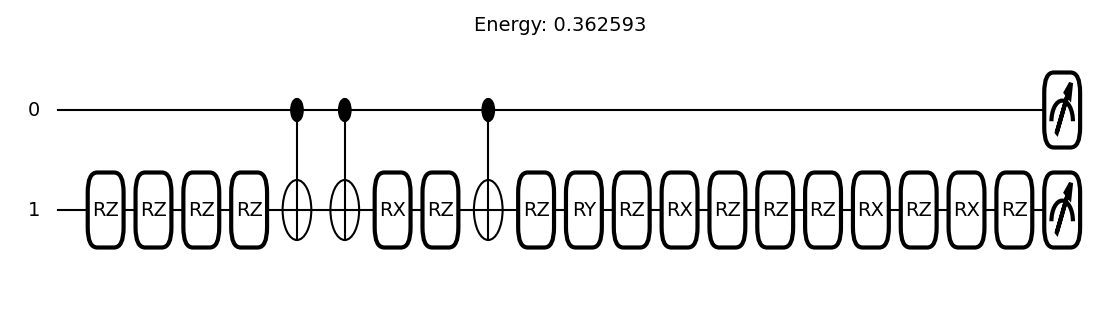

In [11]:
for i in range(10):
    draw_pennylane_circuit(good_circuits.iloc[i])

# SM2(22M) Bad Circuits

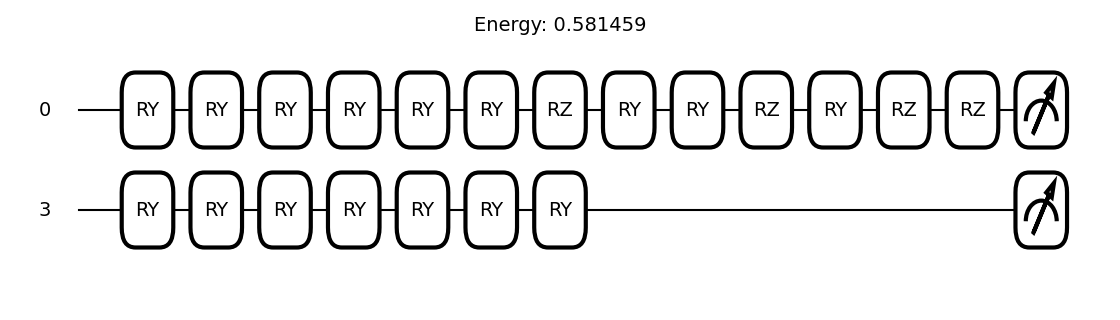

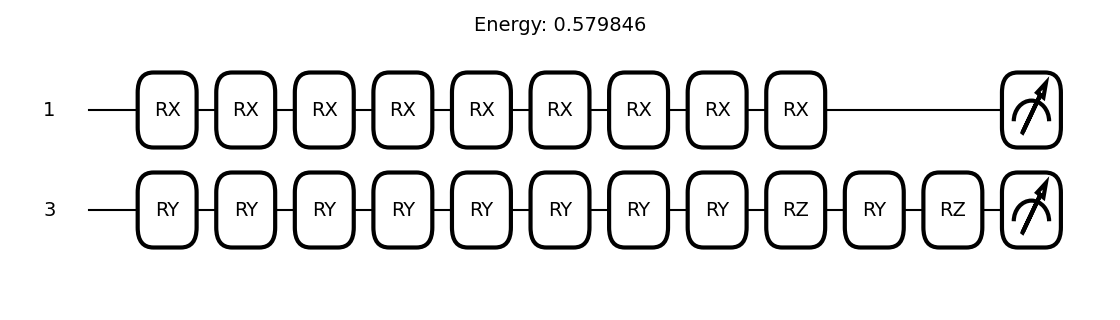

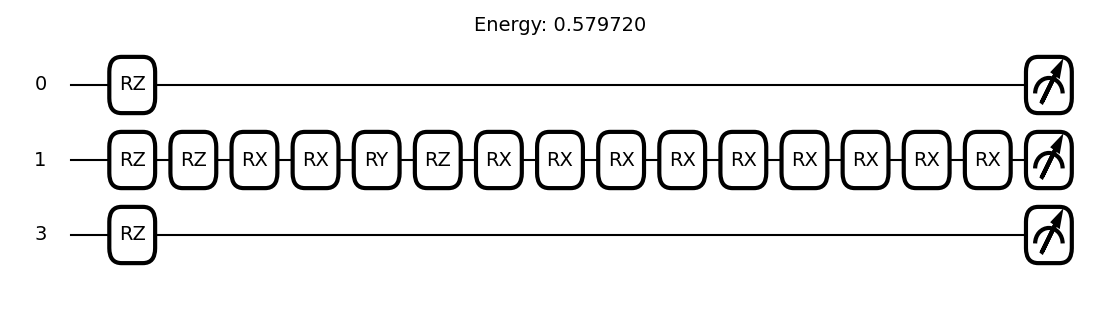

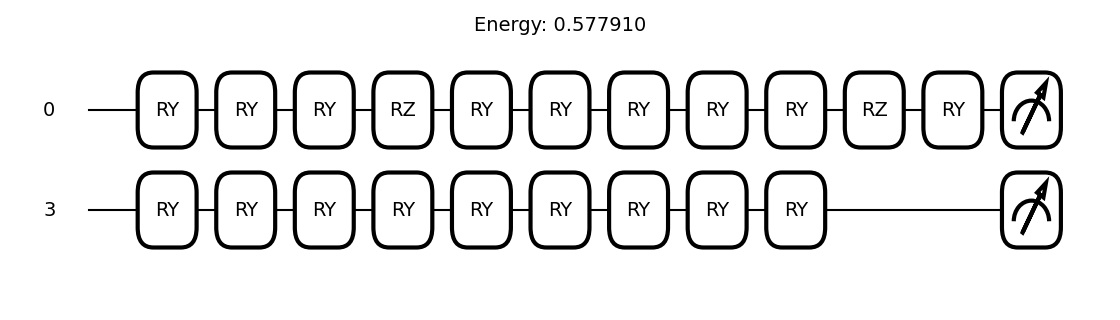

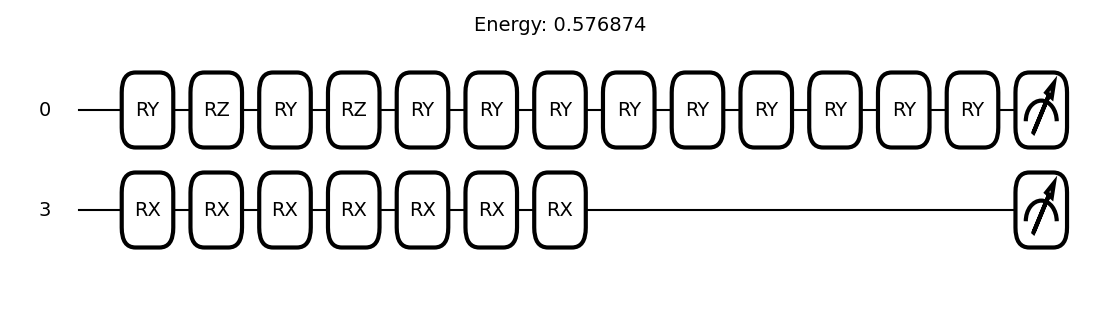

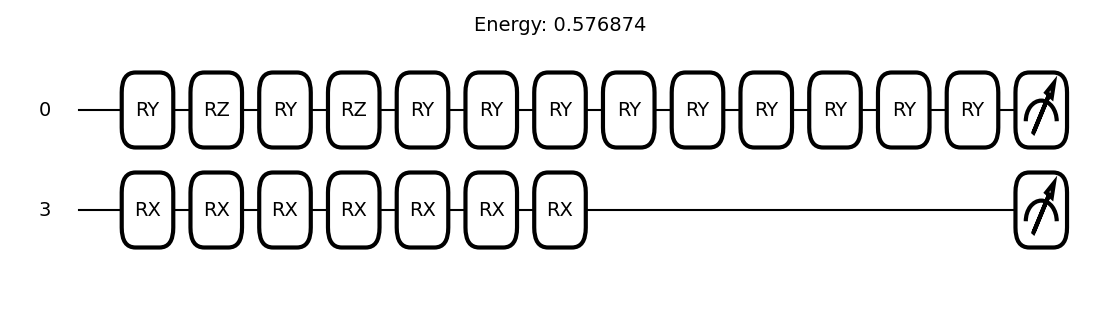

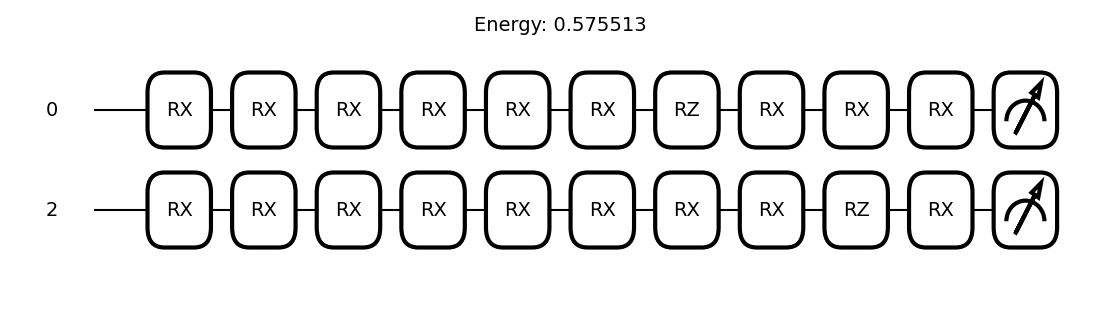

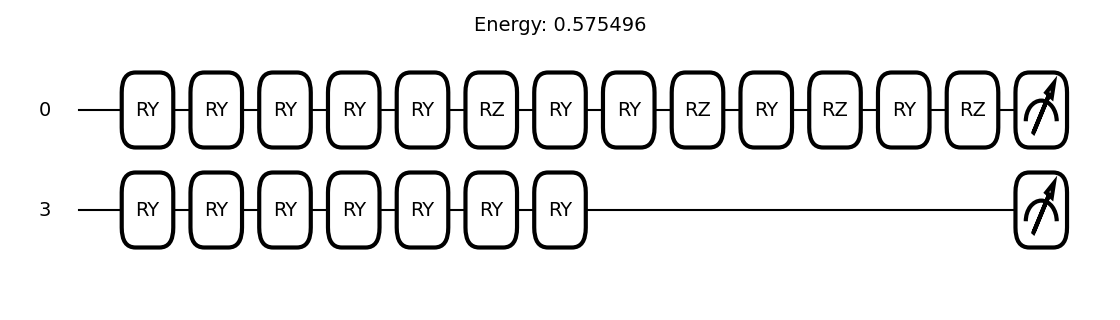

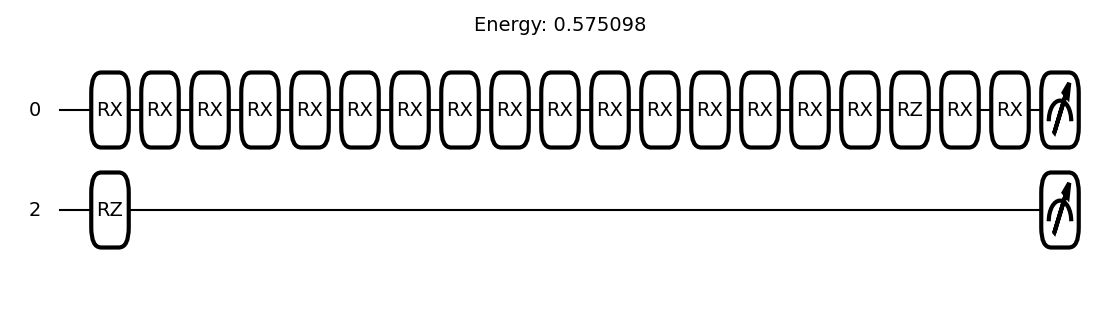

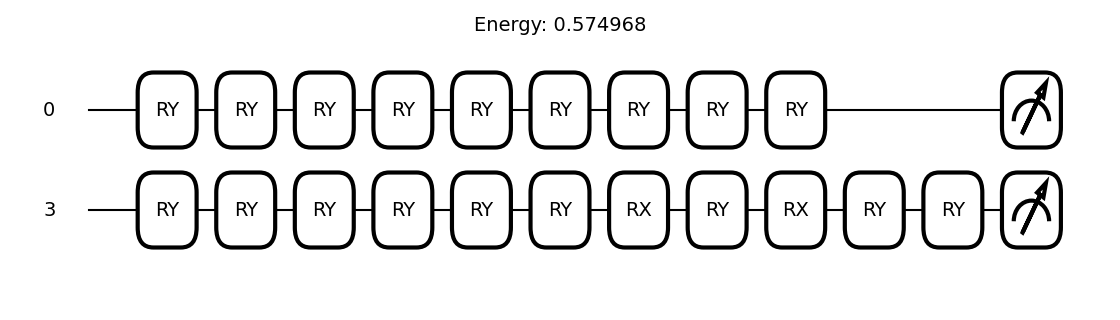

In [12]:
for i in range(10):
    draw_pennylane_circuit(bad_circuits.iloc[i])